In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import text_processing
import utils
import tf_idf
import requests

%matplotlib inline

# Wilde Ride - A Literary Analysis of Oscar Wilde's Corpus
##### Jessica Brown and Lauren Nalajala
## Background
Talk about Oscar Wilde's life here (add image for timeline of his life?)

And the goal of this project here

## Question
State research question
### Motivation

## Data 

### The type of data we collected 

### Where the is data from

### How our data answers our research question 

### Our approach to obtaining the data 

### Our approach to processing and visualizing the data


## 

## Intial Text Processing
Talk about getting the data, processing it (ie. what we removed)

In [ ]:
#Add timeline image here

And the goal of this project here

## Intial Text Processing
We gathered all of our data from Project Gutenberg by scraping. First, we made a list of the urls and title as strings of the Oscar Wilde works we wished to analyze (`ow_corpus_list`).

In [ ]:
ow_corpus_list = ["https://www.gutenberg.org/files/773/773-0.txt", "Lord Arthur Savile's Crime And Other Short Stories",
"https://www.gutenberg.org/cache/epub/902/pg902.txt", "The Happy Prince and Other Short Stories",
"https://www.gutenberg.org/cache/epub/174/pg174.txt", "The Picture of Dorian Grey",
"https://www.gutenberg.org/cache/epub/42704/pg42704.txt", "Salome",
"https://www.gutenberg.org/files/873/873-0.txt", "A House of Pomegranates",
"https://www.gutenberg.org/files/875/875-0.txt", "The Ducchess of Padua",
"https://www.gutenberg.org/files/1017/1017-0.txt", "The Soul of Man Under Socialism",
"https://www.gutenberg.org/files/790/790-0.txt", "Lady Windermeres Fan",
"https://www.gutenberg.org/files/854/854-0.txt", "A Woman of No Importance",
"https://www.gutenberg.org/files/844/844-0.txt", "The Importance of Being Earnest",
"https://www.gutenberg.org/cache/epub/301/pg301.txt", "The Ballad of Reading Gaol",
"https://www.gutenberg.org/files/885/885-0.txt", "An Ideal Husband"]


To retrieve and process this data, we wrote functions in the file `text_processing.py`. First, we ran `get_data_from_book` for "Lord Arthur Savile's Crime". This takes a url and title and returns a list of words that appear in the text. It also creates a .txt file with the same name as the title passed through it, and writes the same text to it. However, this text also has some encoding marks, so we run `remove_encoding_marks`. This removes the first word of the text (which is Project Gutenburg's extraneous text), any "\r\n" combinations, and empty strings.

In [106]:
lasc_raw = text_processing.get_data_from_book(ow_corpus_list[0], ow_corpus_list[1])
lasc_encode = text_processing.remove_encoding_marks(lasc_raw)

['project', 'gutenberg', 'ebook,', 'lord', 'arthur', "savile's", 'crime,', 'by', 'oscar', 'wilde', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'you', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www.gutenberg.org', '', 'lord', 'arthur', "savile's", 'crime', '', 'and', 'other', 'stories', 'author:', 'oscar', 'wilde', '\r\nrelease', 'date:', 'march', '14,', '2013', '[ebook', '#773]', '[this', 'file', 'was', 'first', 'posted', 'on', 'january', '5,', '1997]', 'language:', 'english', 'character', 'set', 'encoding:', 'utf-8', '***start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'lord', 'arthur', "savile's", 'crime***', 'transcribed', 'from', 'the', '1913', 'methuen', 'and', 'co.', 'edition', 'by', 'david', 'price,', 'email\r\nc

As mentioned about, the text retrieved from Project Gutenberg's website includes introductions and closing statements that are not part of the original text, as well as a table of contents. In order to remove these, we use `remove_extra_text`, which removes this extraneous text as well as a given .csv file of common words (in this case, we use the top 200 most popular English language words). We do this by defining a "start word" and "end word", which are words we want the text to start and end at.

In [110]:
lasc_text_only = text_processing.remove_extra_text(lasc_encode, 'chapter', '\r\n\r\n***end')

We will also create a dictionary of start and end words for the other texts.

In [109]:
ow_start_end_words_dict = {"Lord Arthur Savile's Crime and Other Short Stories": ('chapter', '\r\n\r\n***end'),
                           "The Happy Prince and Other Short Stories": ('chapter', '\r\n\r\n***end'),
                           "The Picture of Dorian Grey": ('chapter', '\r\n\r\n***end'),
                           "Salome": ('chapter', '\r\n\r\n***end'),
                           "A House of Pomegranates": ('chapter', '\r\n\r\n***end'),
                           "The Ducchess of Padua": ('chapter', '\r\n\r\n***end'),
                           "The Soul of Man Under Socialism": ('chapter', '\r\n\r\n***end'),
                           "Lady Windermere's Fan": ('chapter', '\r\n\r\n***end'),
                           "A Woman of No Importance": ('chapter', '\r\n\r\n***end'),
                           "The Importance of Being Earnest": ('chapter', '\r\n\r\n***end'),
                           "The Ballad of Reading Gaol": ('chapter', '\r\n\r\n***end'),
                           "An Ideal Husband": ('chapter', '\r\n\r\n***end')}

Finally, we will remove extraneous punctuation marks and titles with `remove_punctuation` and `remove_titles`, respectively. We will also use `remove_character_names` to remove the names of the main characters, which takes a tuple consisting of character names.

In [111]:
lasc_characters = ('windermere', 'arthur', 'savile', 'podgers', 'clementina', 'sybil', 'otis', 'canterville', 'washington', 'virginia', 'umney', 'simon', 'eleanor', 'murchinson', 'alan', 'trevor', 'alroy', 'hughie', 'erskine', 'laura', 'merton')
lasc = text_processing.remove_character_names(text_processing.remove_titles(text_processing.remove_punctuation(lasc_text_only)), lasc_characters)

This leaves us with an edited list of words in a given text (in this case, Lord Arthur Sevile's Crime). With this data, we can analyze Wilde's word usage in this text. However, in order to analyze multiple texts, we must import multiple texts. To do this, we will first create `character_dict`, which maps texts to a tuple of characters in that text. Then, we will use `initial_text_processing` on each text, which will perform all the operations we've done above.

In [ ]:
character_dict = {"Lord Arthur Savile's Crime and Other Short Stories": ('windermere', 'arthur', 'savile', 'podgers', 'clementina', 'sybil', 'otis', 'canterville', 'washington', 'virginia', 'umney', 'simon', 'eleanor', 'murchinson', 'alan', 'trevor', 'alroy', 'hughie', 'erskine', 'laura', 'merton'),
                           "The Happy Prince and Other Short Stories": ("happy", 'prince', 'swallow', 'student', 'nightingale', 'giant', 'hans', 'miller', 'rocket'),
                           "The Picture of Dorian Grey": ('dorian', 'basil', 'wolton', 'james', 'gray', 'hallward', 'sibyl', 'vane', 'campbell', 'fermor', 'singleton', 'victoria'),
                           "Salome": ('herod', 'judea', 'tigellinus', 'salome', 'antipas', 'jokanaan', 'herodius'),
                           "A House of Pomegranates": ('young', 'dwarf', 'fisherman', 'soul', 'king', 'infanta', 'mermaid', 'star-child'),
                           "The Ducchess of Padua": ('simone', 'andrea', 'taddeo', 'moranzano', 'gesso', 'maffio', 'guido', 'bernardo', 'beatrice', 'jeppo', 'ascanio', 'ugo', 'lucia'),
                           "The Soul of Man Under Socialism": (,),
                           "Lady Windermere's Fan": ('chapter', '\r\n\r\n***end'),
                           "A Woman of No Importance": ('chapter', '\r\n\r\n***end'),
                           "The Importance of Being Earnest": ('chapter', '\r\n\r\n***end'),
                           "The Ballad of Reading Gaol": ('chapter', '\r\n\r\n***end'),
                           "An Ideal Husband": ('chapter', '\r\n\r\n***end')}

## Word Usage
We decided to filter out the most common words from our alliterative sequence function and tf-idf functions to glean more pertinent insights from the data. Below is a plot of the most common words across all books that helped inform the list of common words we filtered from the data.

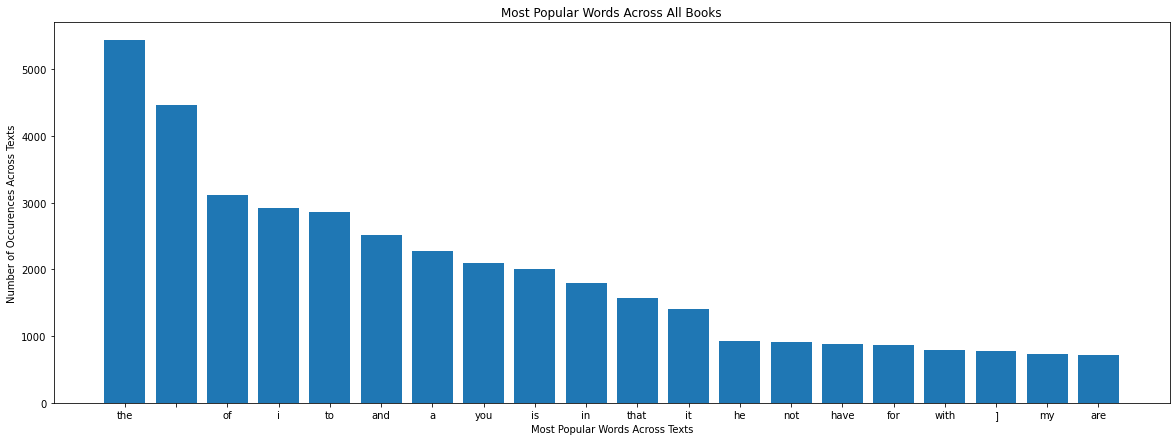

In [1]:
# Plot of most popular words across all books, in descending order from left to right
## Lauren can u replace these urls with ur own txt files of all the books - i just dont have them all downloaded
from utils import plot_most_freq_words_texts
from plotting import plot_freq_bar

# List of tuples, where each tuple corresponds to a text in his corpus. The first tuple index represents the url of the text file, which is helpful
# in extracting the data, and the second index is the name of the book, which ends up being used to name the local text file on our machine.
list_of_urls = [
    ("https://www.gutenberg.org/files/885/885-0.txt", "ideal_husband"),
    ("https://www.gutenberg.org/cache/epub/42704/pg42704.txt", "salome"),
    ("https://www.gutenberg.org/files/844/844-0.txt", "importance_earnest"),
    ("https://www.gutenberg.org/cache/epub/921/pg921.txt", "de_profundis"),
    ("https://www.gutenberg.org/cache/epub/30120/pg30120.txt", "happy_prince"),
]
num_data_pts = 20
freqs = plot_most_freq_words_texts(list_of_urls, num_data_pts)
plot_freq_bar(freqs)

Analyze most commonly used words here

## By the Numbers - some sort of catchy title here?
Numerical analysis of Wilde's writing - average length of words, average length of sentences over time
Maybe a comparison with another book?

## How Verbose was Oscar Wilde Over Time? Why Might his verbosity have changed? 
### Average Sentence Length Across All Books

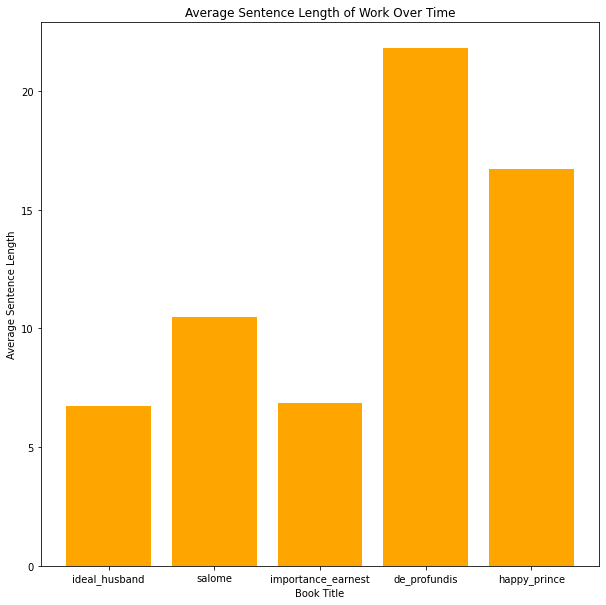

In [2]:
from utils import get_avg_sentence_length
from plotting import plot_avg_sentence_lengths_all_books
list_of_urls = [
    ("https://www.gutenberg.org/files/885/885-0.txt", "ideal_husband"),
    ("https://www.gutenberg.org/cache/epub/42704/pg42704.txt", "salome"),
    ("https://www.gutenberg.org/files/844/844-0.txt", "importance_earnest"),
    ("https://www.gutenberg.org/cache/epub/921/pg921.txt", "de_profundis"),
    ("https://www.gutenberg.org/cache/epub/30120/pg30120.txt", "happy_prince"),
]
sentence_lengths = get_avg_sentence_length(list_of_urls)
plot_avg_sentence_lengths_all_books(sentence_lengths)

Discuss how Wilde's writing style changed over time, as well as how he compares to other authors of his time

Analyze most commonly used words here

## What counts as an alliterative sequence?
We decided to define an alliterative sequence as two consecutive words in the same sentence that have the same starting phoneme, or sound. 
We decided not to do words with spacing in between them due to time constraints. 

Numerical analysis of Wilde's writing - average length of words, average length of sentences over time
Maybe a comparison with another book?

ideal_husband
salome
importance_earnest
de_profundis
happy_prince


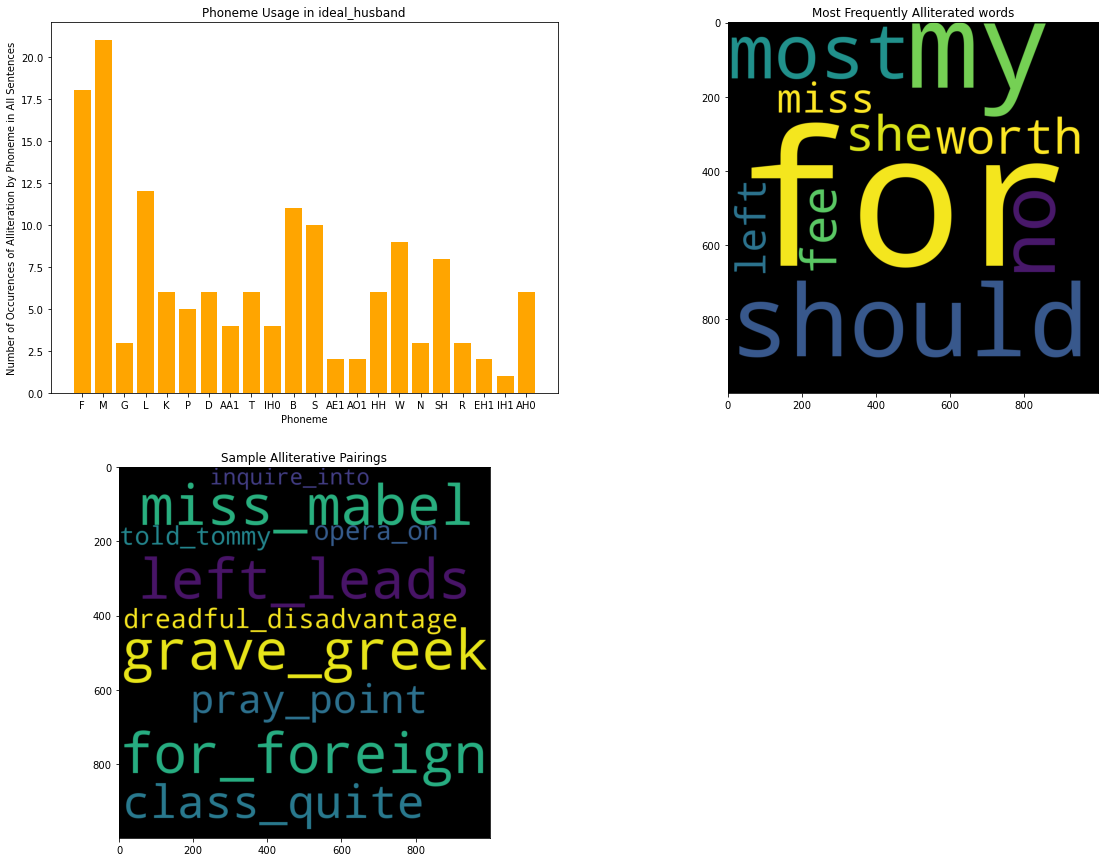

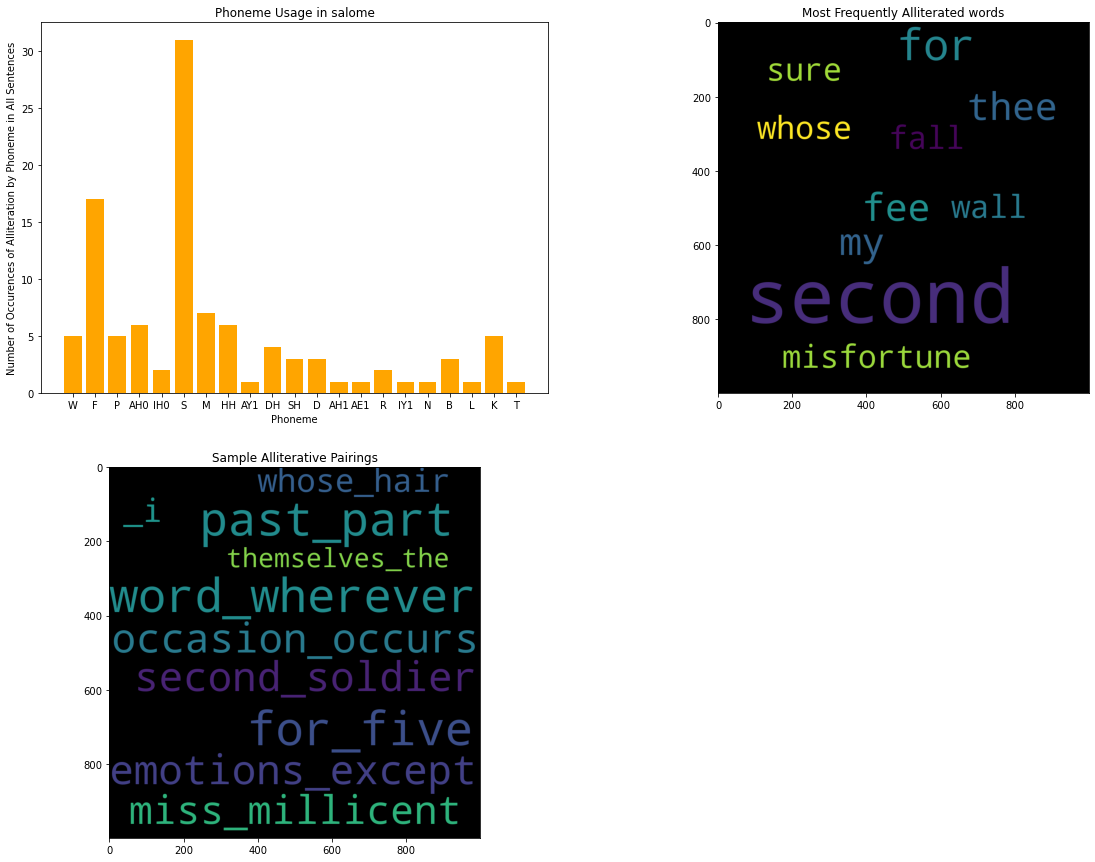

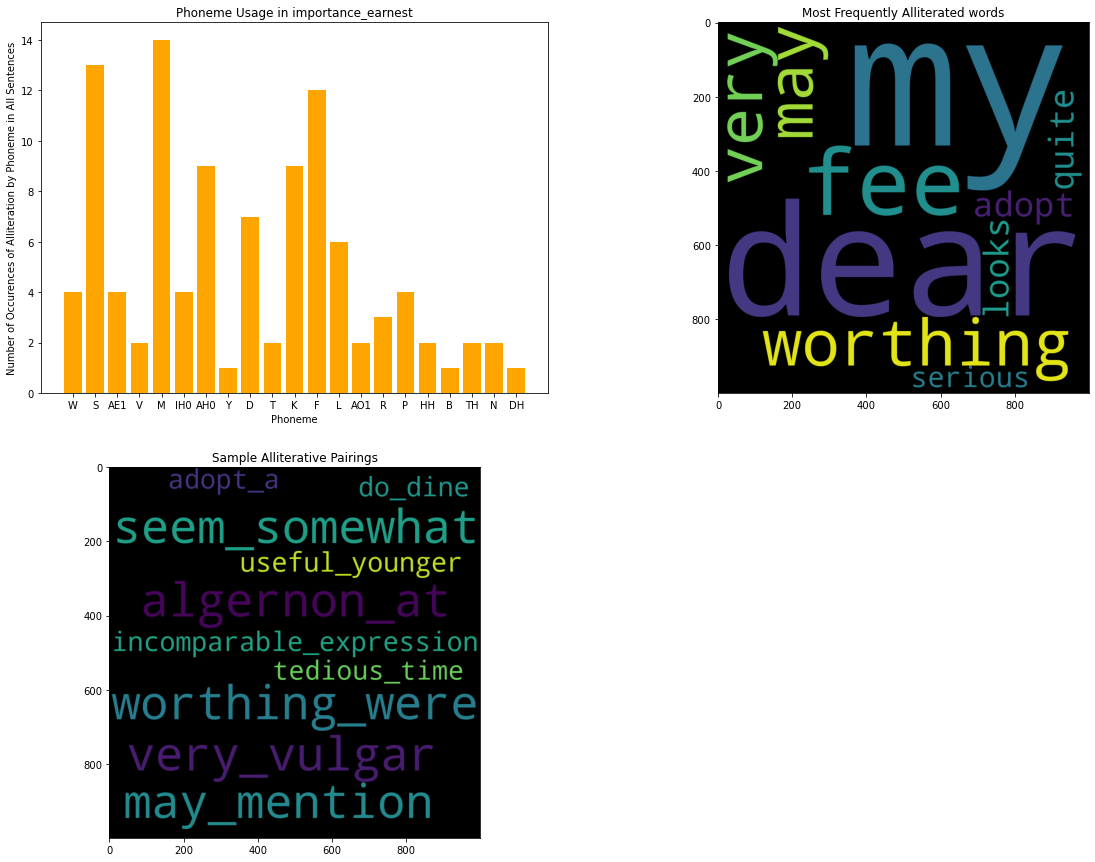

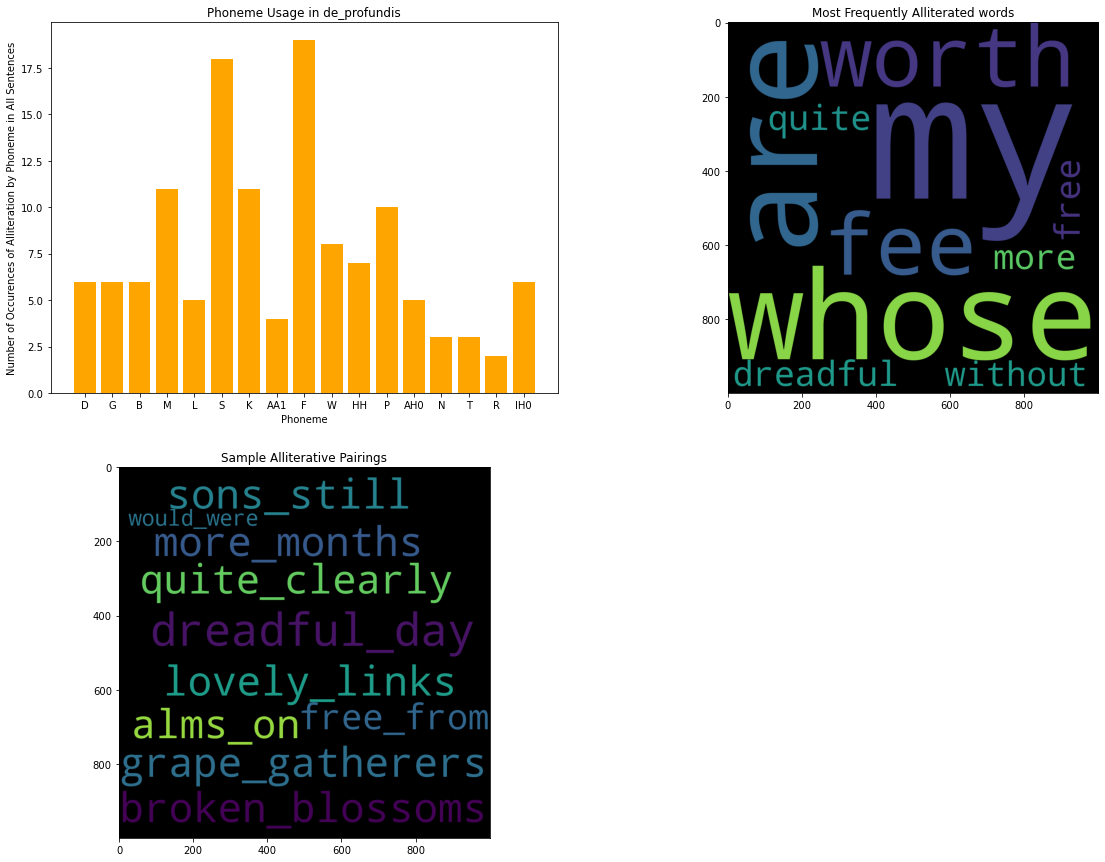

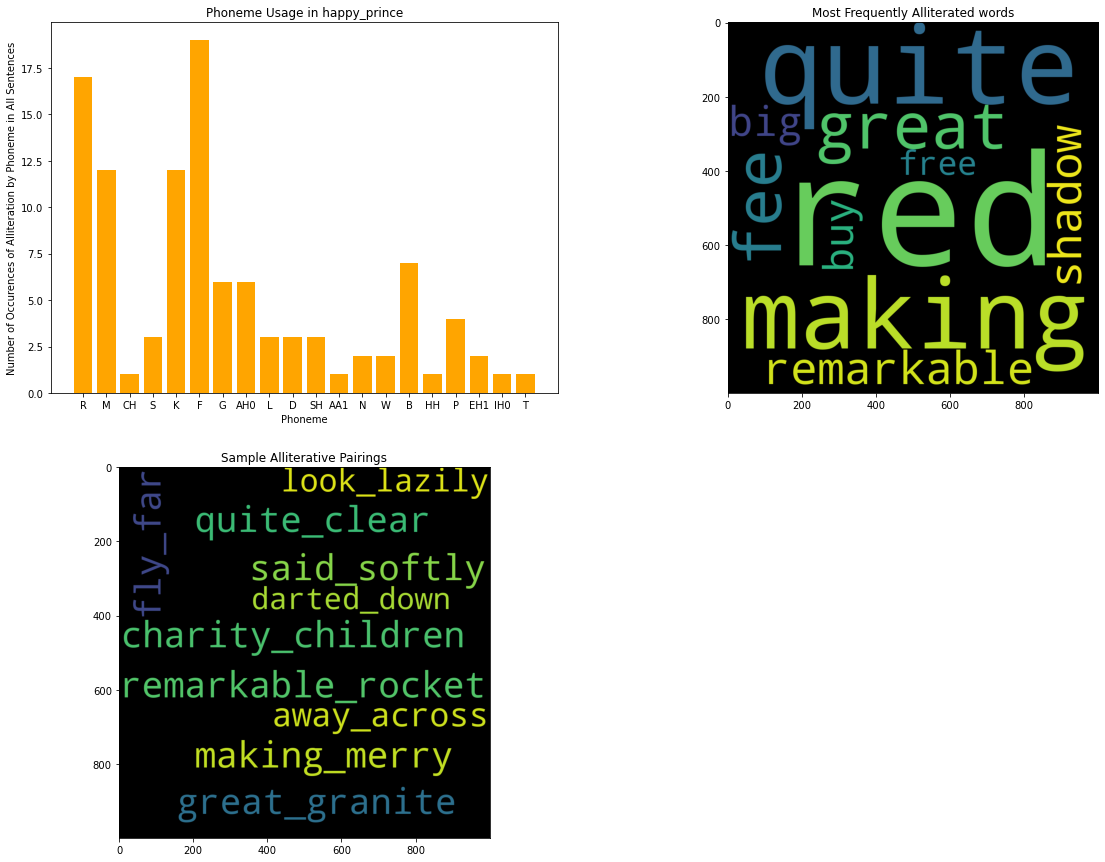

In [1]:
from utils import get_all_alliteration_by_phoneme
list_of_urls = [
    ("https://www.gutenberg.org/files/885/885-0.txt", "ideal_husband"),
    ("https://www.gutenberg.org/cache/epub/42704/pg42704.txt", "salome"),
    ("https://www.gutenberg.org/files/844/844-0.txt", "importance_earnest"),
    ("https://www.gutenberg.org/cache/epub/921/pg921.txt", "de_profundis"),
    ("https://www.gutenberg.org/cache/epub/30120/pg30120.txt", "happy_prince"),
]
get_all_alliteration_by_phoneme(list_of_urls)

## TF-IDF
Explain what TF-IDF is, the formula for it, and graph it for individual books\
Also plot TF-IDF of certain words over time 

In [ ]:
#TF-IDF plots here

## Analysis 

## Conclusions 

## Reflection


## Difficulties 
alliteration stuff - some phonemes dont map to anything in the dictionary, so not all alliterative sequences are accounted for

splitting text into sentences is hard cause of edge cases and for some reason our function doesnt take care of punctuation so we have to do that in other functions

plotting functions are separate because we couldnt unit test with matplotlib

## Limitations 
alliteratative sequences are only sequential and length 2 to make code easier and because of time constraints

certain unit tests are limited - because of the fact that some alliterative sequences dont map phonemes to phonemes in the dictionary they return none from get_phonemes so its hard to unit test robustly
## Potential Future Work 
future work would include bettering our sentence creating function to eliminate punctuation and better account for edge cases we probably haven't thought of yet